# JupyterLite で学ぶ seaborn 初級チュートリアル

このノートブックは、**JupyterLite（ブラウザだけで動く Jupyter 環境）** 上で、
統計的データ可視化ライブラリ **seaborn** の基礎を一から学ぶためのチュートリアルです。

## 対象者
- Python と matplotlib の基本を理解している方
- より美しい統計グラフを簡単に作成したい方
- seaborn を初めて使う方、または基礎を復習したい方

## このチュートリアルで学ぶこと
1. seaborn の特徴と設定
2. 分布の可視化
3. カテゴリカルデータの可視化
4. 関係性の可視化
5. 回帰の可視化
6. スタイルとカラーパレット

## 0. 環境準備（JupyterLite 用）

まず、必要なライブラリをインストールします。

In [1]:
# JupyterLite 用のパッケージインストール
try:
    import piplite
    await piplite.install(['numpy', 'pandas', 'matplotlib', 'seaborn'])
except ImportError:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f'seaborn バージョン: {sns.__version__}')

# 日本語フォントの設定（JupyterLite環境用）
try:
    import japanize_matplotlib_jlite
except:
    pass

seaborn バージョン: 0.13.2


---
## 1. seaborn の特徴と設定

### 1.1 seaborn の特徴

- **美しいデフォルトスタイル**: matplotlib より洗練されたデザイン
- **統計的グラフ**: ヒストグラム、箱ひげ図、回帰線などを簡単に作成
- **pandas との連携**: DataFrame を直接渡せる
- **カテゴリカルデータ対応**: カテゴリ変数の可視化が得意

In [2]:
# サンプルデータセットの読み込み
tips = sns.load_dataset('tips')
print('tips データセット:')
print(tips.head())
print(f'\n形状: {tips.shape}')

tips データセット:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

形状: (244, 7)


In [3]:
# iris データセット
iris = sns.load_dataset('iris')
print('iris データセット:')
print(iris.head())

iris データセット:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
# titanic データセット
titanic = sns.load_dataset('titanic')
print('titanic データセット:')
print(titanic.head())

titanic データセット:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### 1.2 スタイルの設定

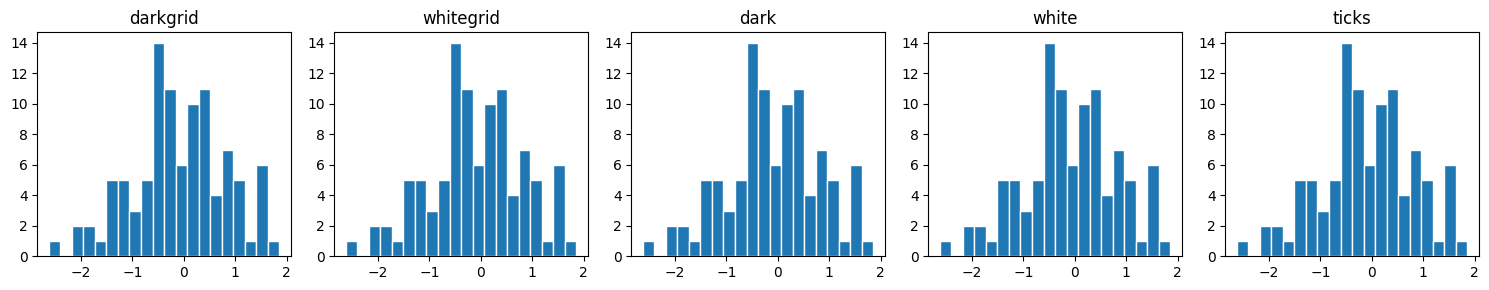

In [5]:
# スタイルの比較
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

np.random.seed(42)
data = np.random.randn(100)

for ax, style in zip(axes, styles):
    with sns.axes_style(style):
        ax.hist(data, bins=20)
        ax.set_title(style)

plt.tight_layout()
plt.show()

In [6]:
# デフォルトスタイルの設定
sns.set_style('whitegrid')
sns.set_palette('husl')

---
## 2. 分布の可視化

### 2.1 ヒストグラム（histplot）

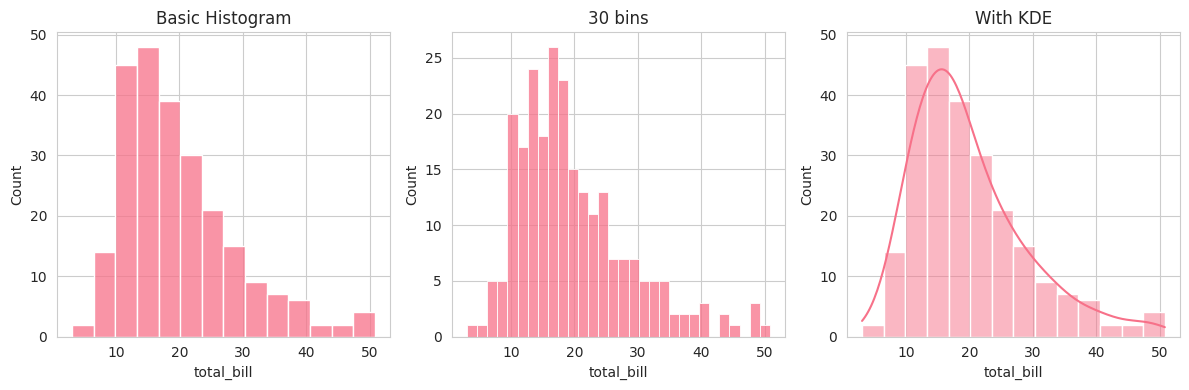

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 基本的なヒストグラム
sns.histplot(tips['total_bill'], ax=axes[0])
axes[0].set_title('Basic Histogram')

# ビン数を指定
sns.histplot(tips['total_bill'], bins=30, ax=axes[1])
axes[1].set_title('30 bins')

# KDE（カーネル密度推定）を追加
sns.histplot(tips['total_bill'], kde=True, ax=axes[2])
axes[2].set_title('With KDE')

plt.tight_layout()
plt.show()

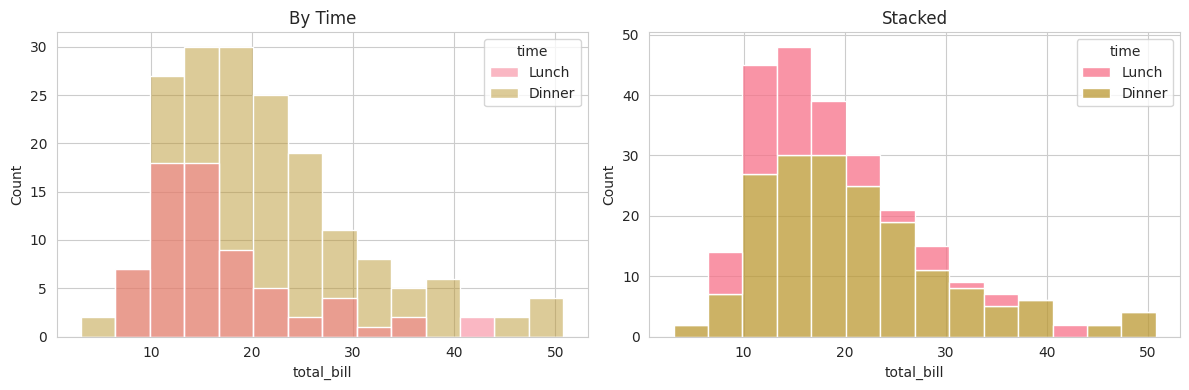

In [8]:
# カテゴリごとのヒストグラム
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# hue でカテゴリ分け
sns.histplot(data=tips, x='total_bill', hue='time', ax=axes[0])
axes[0].set_title('By Time')

# 積み上げヒストグラム
sns.histplot(data=tips, x='total_bill', hue='time', multiple='stack', ax=axes[1])
axes[1].set_title('Stacked')

plt.tight_layout()
plt.show()

### 2.2 カーネル密度推定（kdeplot）

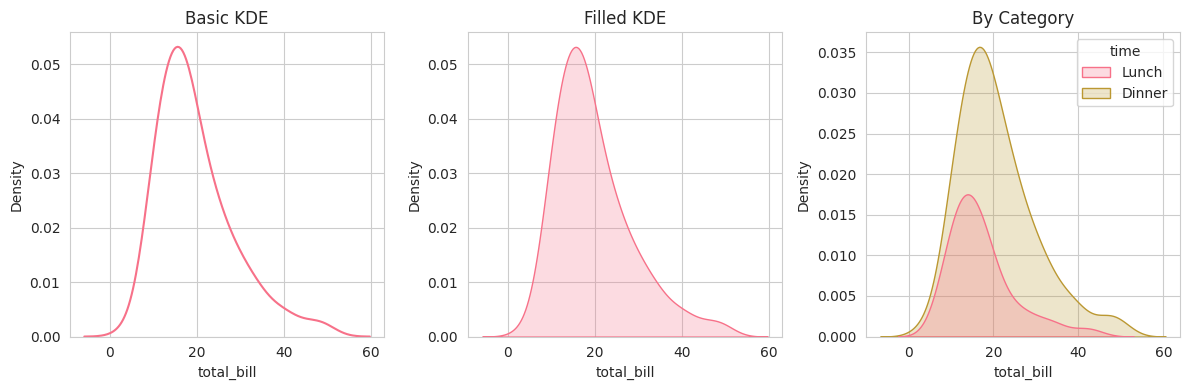

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 基本的なKDE
sns.kdeplot(tips['total_bill'], ax=axes[0])
axes[0].set_title('Basic KDE')

# 塗りつぶし
sns.kdeplot(tips['total_bill'], fill=True, ax=axes[1])
axes[1].set_title('Filled KDE')

# カテゴリごと
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True, ax=axes[2])
axes[2].set_title('By Category')

plt.tight_layout()
plt.show()

### 2.3 2次元分布

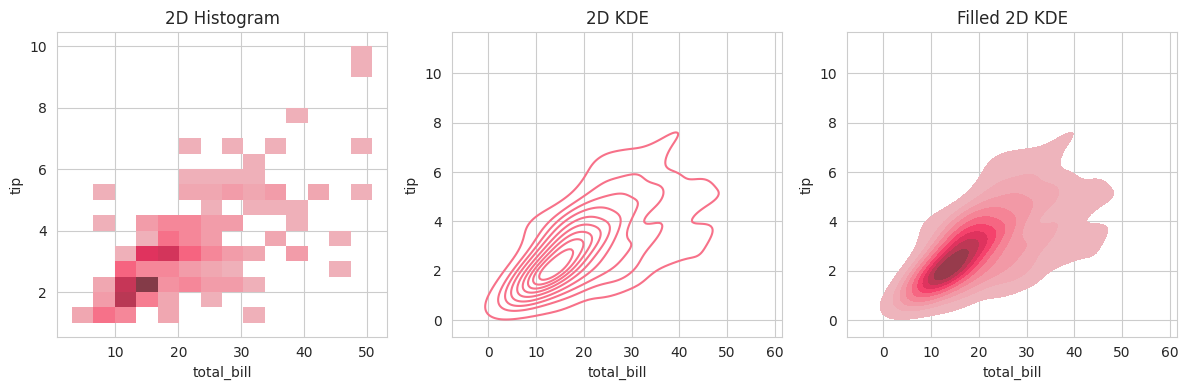

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 2次元ヒストグラム
sns.histplot(data=tips, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('2D Histogram')

# 2次元KDE
sns.kdeplot(data=tips, x='total_bill', y='tip', ax=axes[1])
axes[1].set_title('2D KDE')

# 塗りつぶしKDE
sns.kdeplot(data=tips, x='total_bill', y='tip', fill=True, ax=axes[2])
axes[2].set_title('Filled 2D KDE')

plt.tight_layout()
plt.show()

### 2.4 分布の比較（displot）

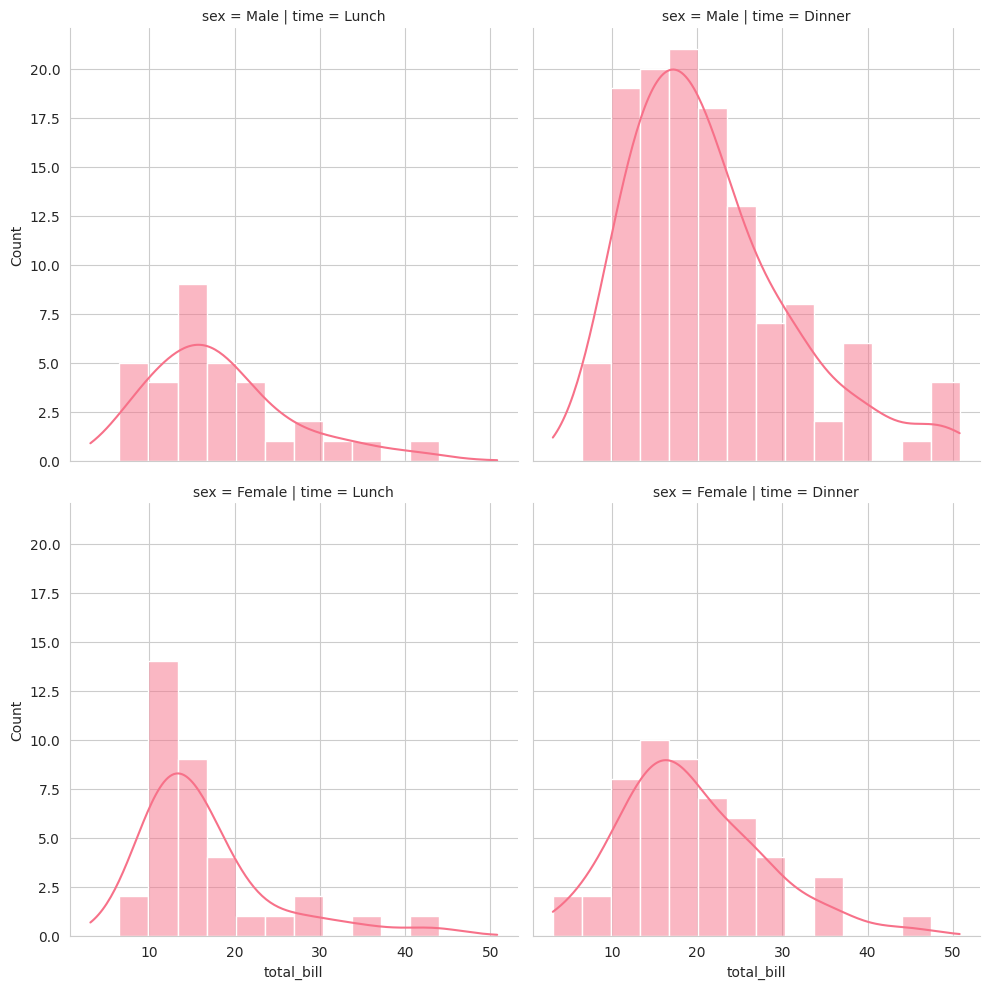

In [11]:
# FacetGrid を使った複数パネル
g = sns.displot(data=tips, x='total_bill', col='time', row='sex', kde=True)
plt.show()

### 📝 2章 練習問題

iris データセットを使って以下を実行してください。

1. sepal_length のヒストグラム（KDE付き）を作成
2. species ごとに色分けした petal_length のKDEを作成

In [12]:
# 練習問題の解答欄



---
## 3. カテゴリカルデータの可視化

### 3.1 棒グラフ（barplot）

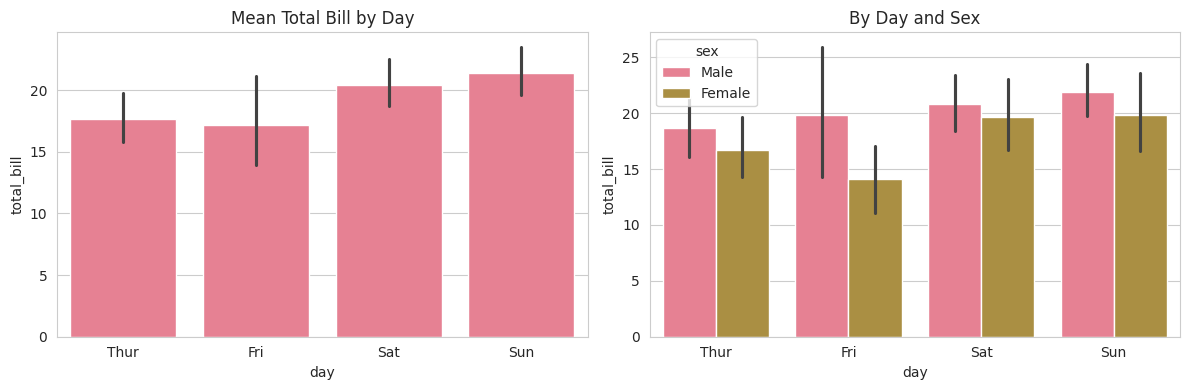

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 基本的な棒グラフ（平均値と信頼区間）
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0])
axes[0].set_title('Mean Total Bill by Day')

# hue でカテゴリ分け
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ax=axes[1])
axes[1].set_title('By Day and Sex')

plt.tight_layout()
plt.show()

### 3.2 カウントプロット（countplot）

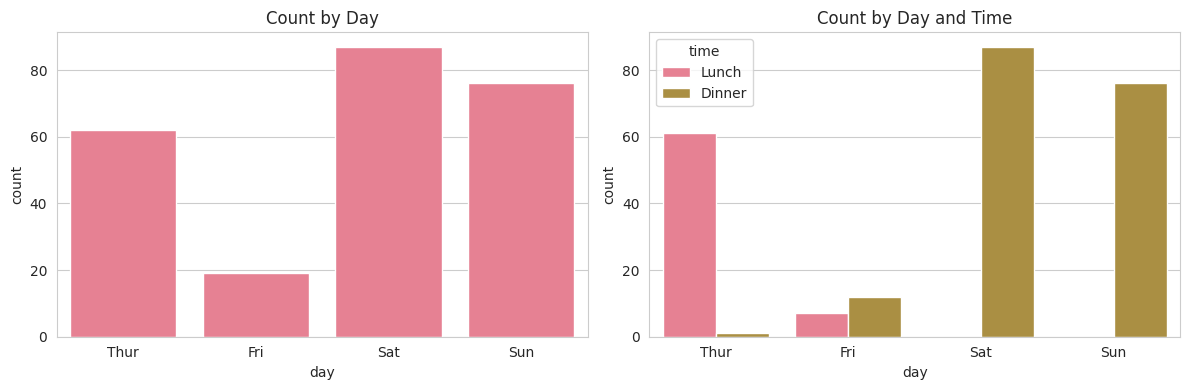

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# カテゴリごとのカウント
sns.countplot(data=tips, x='day', ax=axes[0])
axes[0].set_title('Count by Day')

# hue でカテゴリ分け
sns.countplot(data=tips, x='day', hue='time', ax=axes[1])
axes[1].set_title('Count by Day and Time')

plt.tight_layout()
plt.show()

### 3.3 箱ひげ図（boxplot）

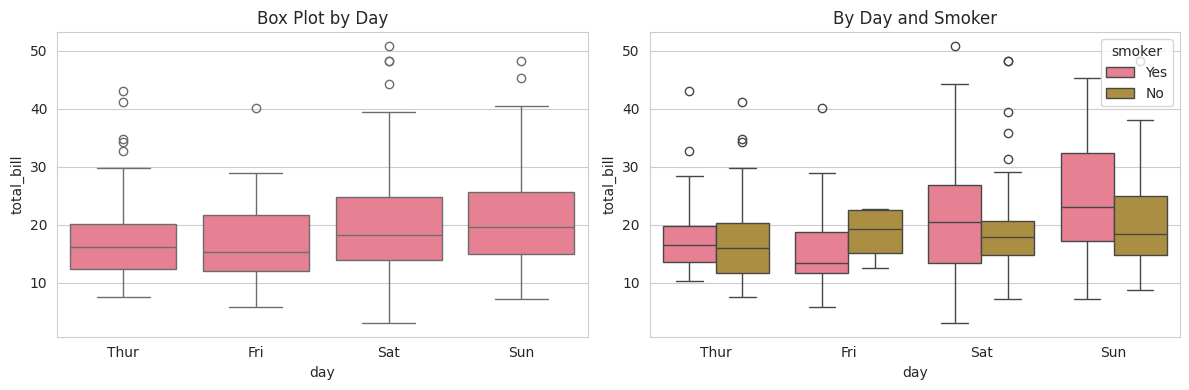

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 基本的な箱ひげ図
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0])
axes[0].set_title('Box Plot by Day')

# hue でカテゴリ分け
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker', ax=axes[1])
axes[1].set_title('By Day and Smoker')

plt.tight_layout()
plt.show()

### 3.4 バイオリンプロット（violinplot）

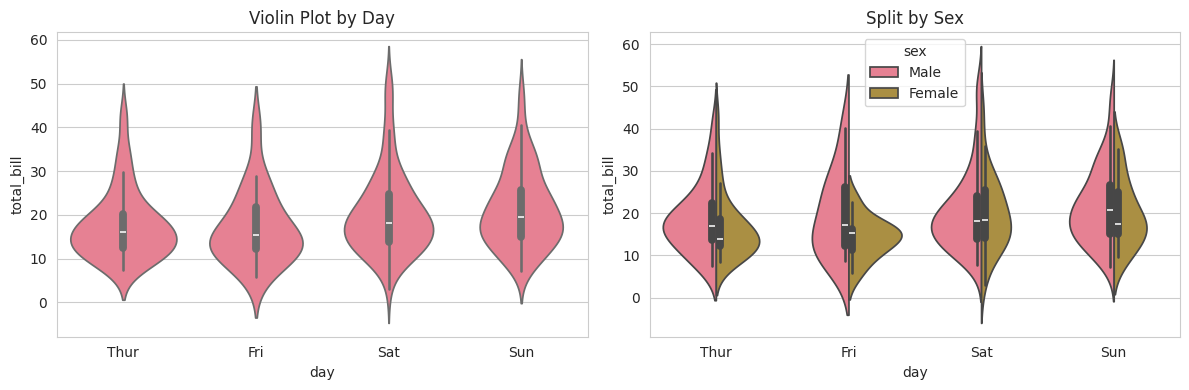

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 基本的なバイオリンプロット
sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[0])
axes[0].set_title('Violin Plot by Day')

# split で左右に分割
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True, ax=axes[1])
axes[1].set_title('Split by Sex')

plt.tight_layout()
plt.show()

### 3.5 スウォームプロット（swarmplot）

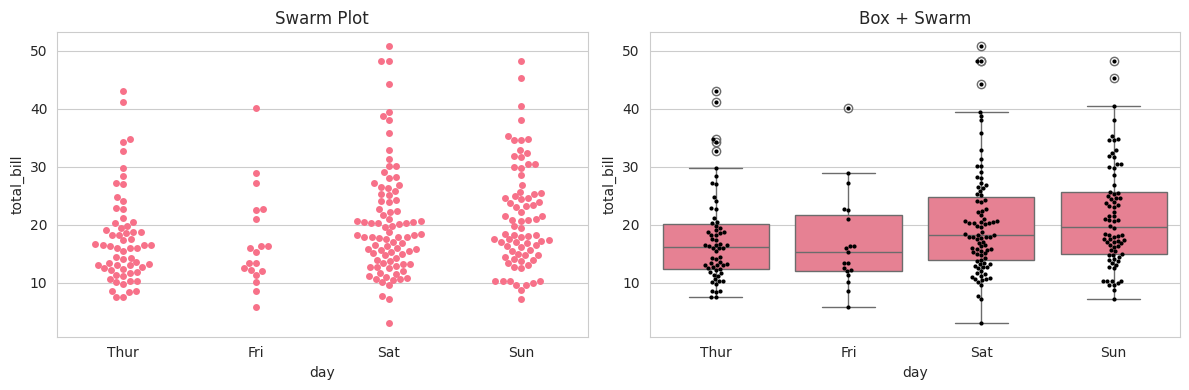

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 個々のデータポイントを表示
sns.swarmplot(data=tips, x='day', y='total_bill', ax=axes[0])
axes[0].set_title('Swarm Plot')

# 箱ひげ図と組み合わせ
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1])
sns.swarmplot(data=tips, x='day', y='total_bill', color='black', size=3, ax=axes[1])
axes[1].set_title('Box + Swarm')

plt.tight_layout()
plt.show()

### 3.6 ストリッププロット（stripplot）

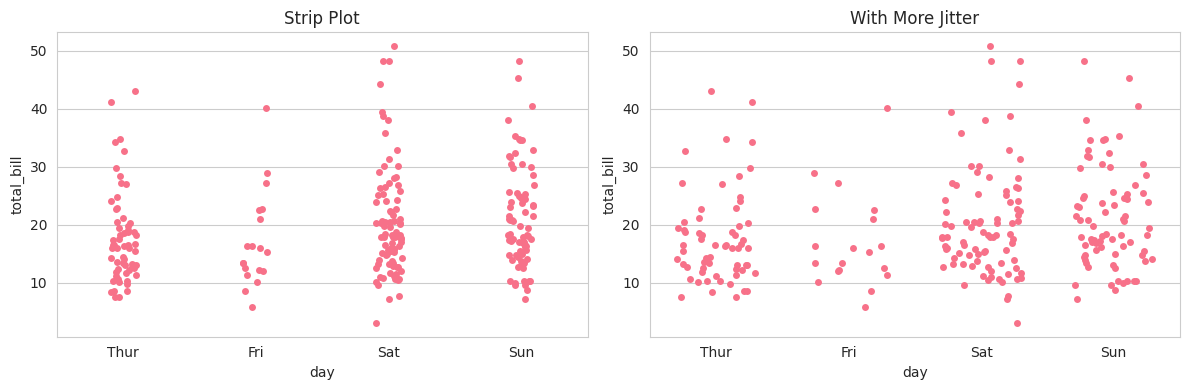

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 基本的なストリッププロット
sns.stripplot(data=tips, x='day', y='total_bill', ax=axes[0])
axes[0].set_title('Strip Plot')

# ジッター量を調整
sns.stripplot(data=tips, x='day', y='total_bill', jitter=0.3, ax=axes[1])
axes[1].set_title('With More Jitter')

plt.tight_layout()
plt.show()

### 3.7 catplot（FacetGrid 対応）

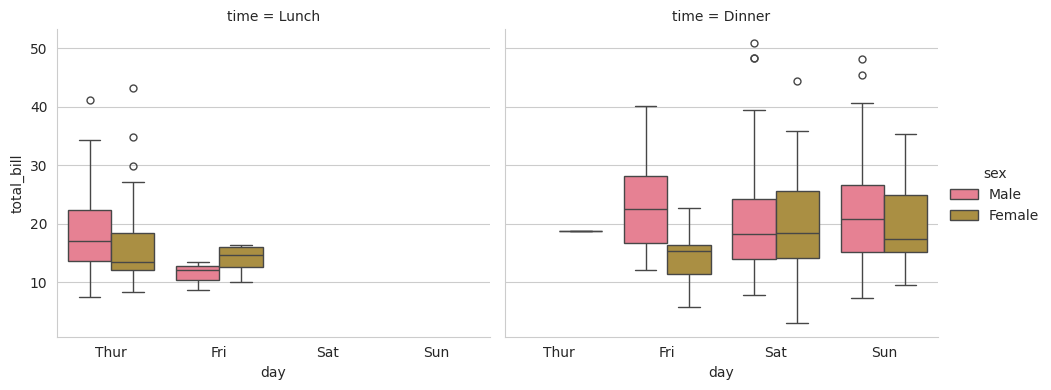

In [19]:
# 複数パネルのカテゴリカルプロット
g = sns.catplot(data=tips, x='day', y='total_bill', 
                hue='sex', col='time',
                kind='box', height=4, aspect=1.2)
plt.show()

---
## 4. 関係性の可視化

### 4.1 散布図（scatterplot）

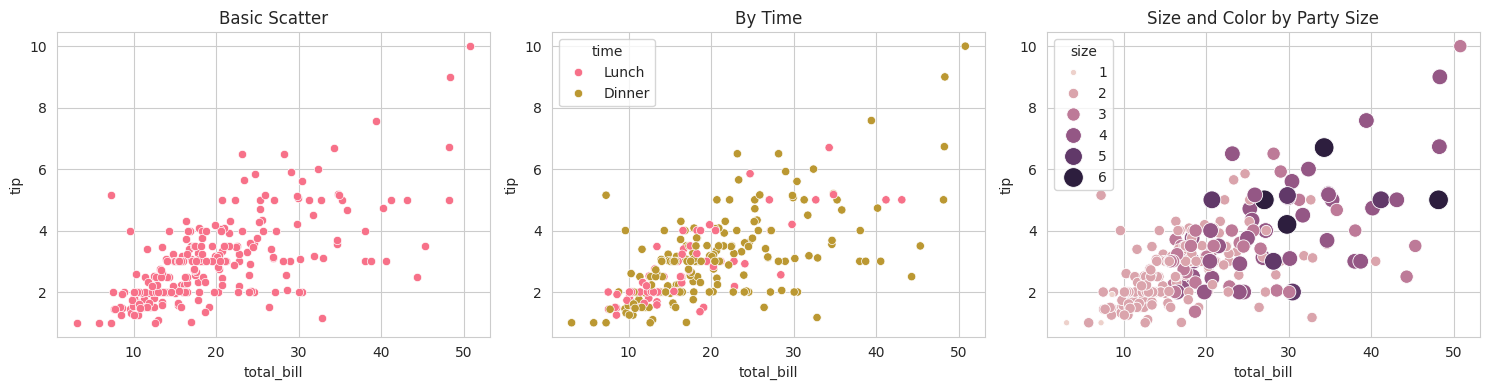

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 基本的な散布図
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('Basic Scatter')

# hue でカテゴリ分け
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=axes[1])
axes[1].set_title('By Time')

# サイズと色でマッピング
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='size', size='size', sizes=(20, 200), ax=axes[2])
axes[2].set_title('Size and Color by Party Size')

plt.tight_layout()
plt.show()

### 4.2 折れ線グラフ（lineplot）

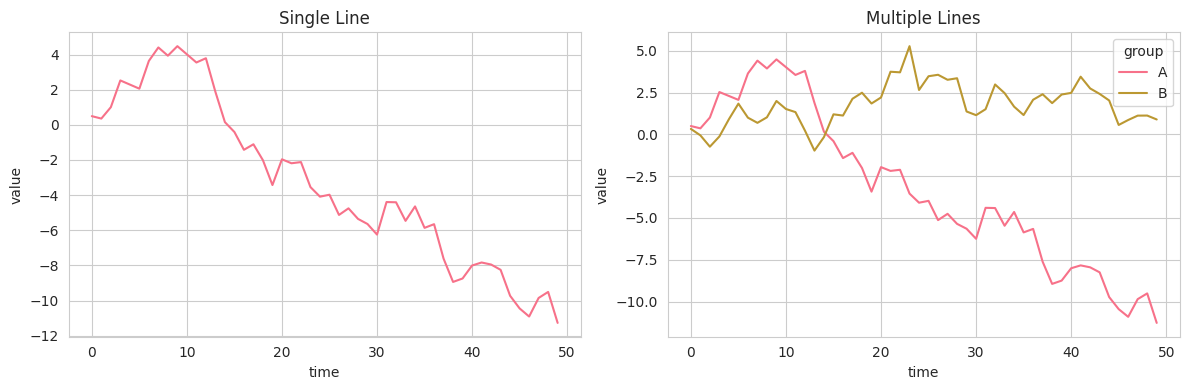

In [21]:
# 時系列風のデータを作成
np.random.seed(42)
n = 50
time_data = pd.DataFrame({
    'time': list(range(n)) * 2,
    'value': list(np.cumsum(np.random.randn(n))) + list(np.cumsum(np.random.randn(n))),
    'group': ['A'] * n + ['B'] * n
})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 基本的な折れ線グラフ
sns.lineplot(data=time_data[time_data['group'] == 'A'], x='time', y='value', ax=axes[0])
axes[0].set_title('Single Line')

# グループ別
sns.lineplot(data=time_data, x='time', y='value', hue='group', ax=axes[1])
axes[1].set_title('Multiple Lines')

plt.tight_layout()
plt.show()

### 4.3 ペアプロット（pairplot）

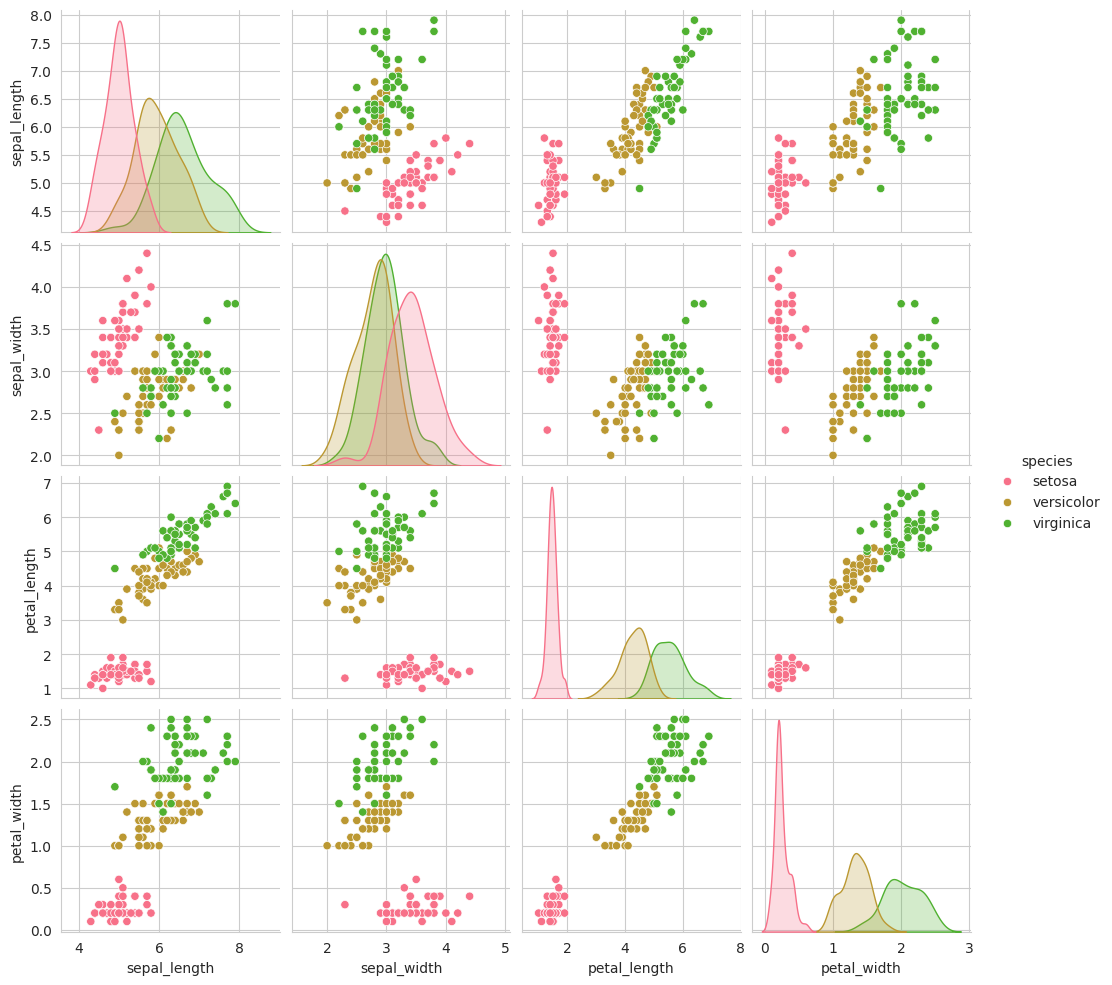

In [22]:
# すべての数値変数の組み合わせをプロット
g = sns.pairplot(iris, hue='species')
plt.show()

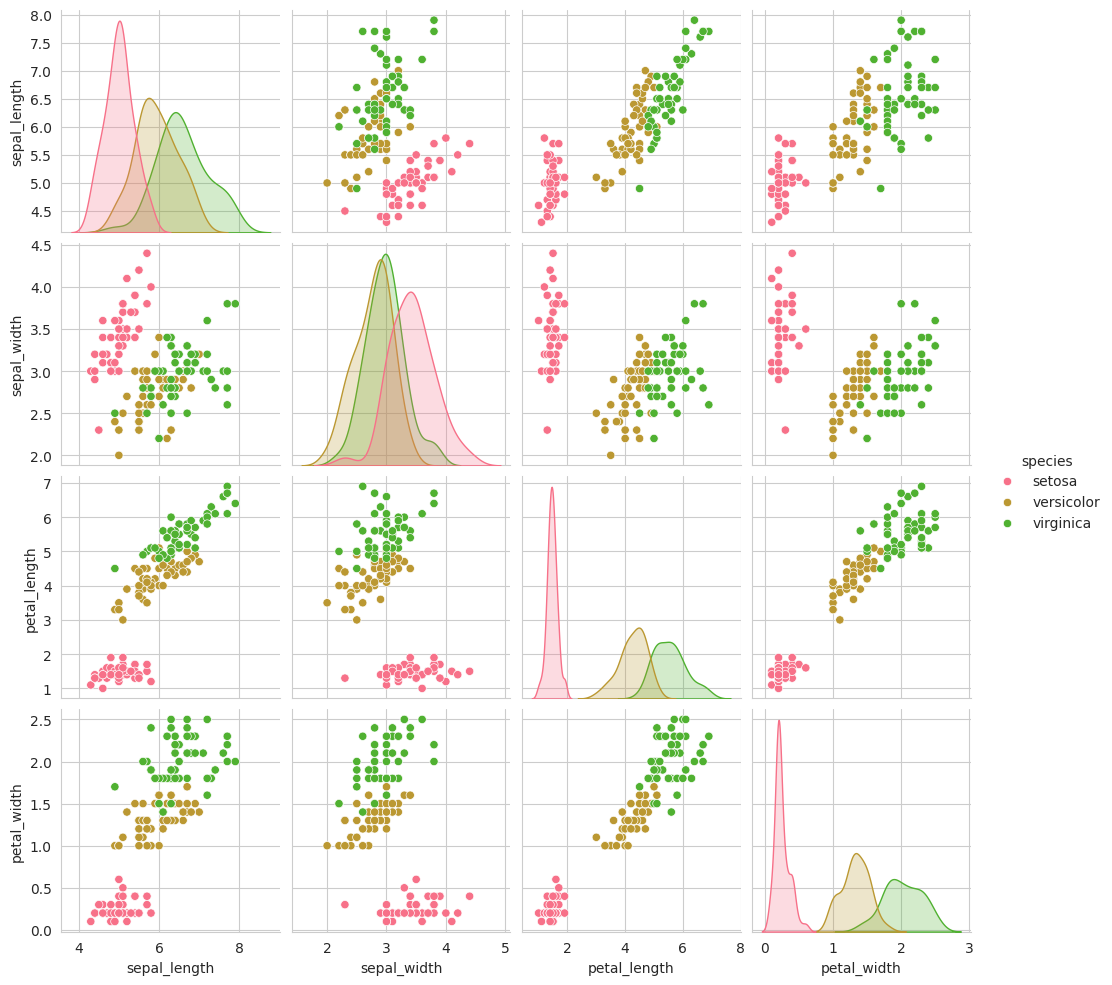

In [23]:
# 対角線のプロット種類を変更
g = sns.pairplot(iris, hue='species', diag_kind='kde')
plt.show()

### 4.4 相関行列のヒートマップ

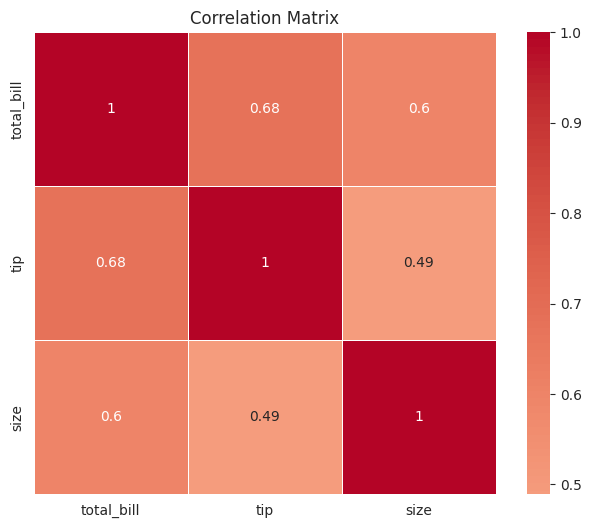

In [24]:
# 数値データの相関行列
numeric_tips = tips.select_dtypes(include=[np.number])
corr = numeric_tips.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 4.5 jointplot

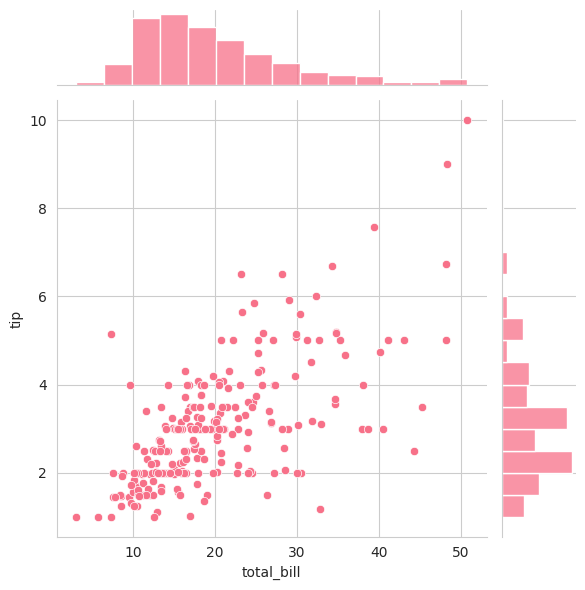

In [25]:
# 散布図と周辺分布
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter')
plt.show()

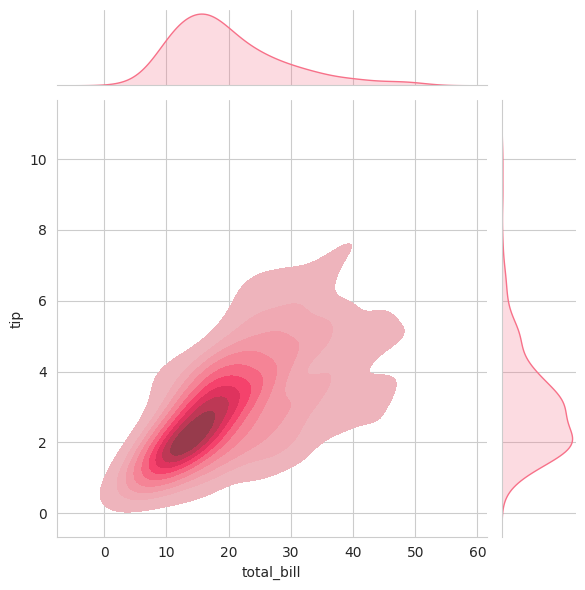

In [26]:
# KDE版
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', fill=True)
plt.show()

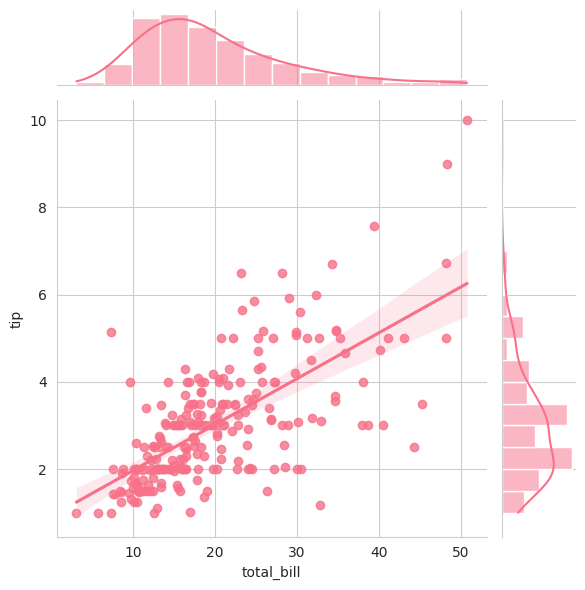

In [27]:
# 回帰線付き
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')
plt.show()

---
## 5. 回帰の可視化

### 5.1 regplot（回帰プロット）

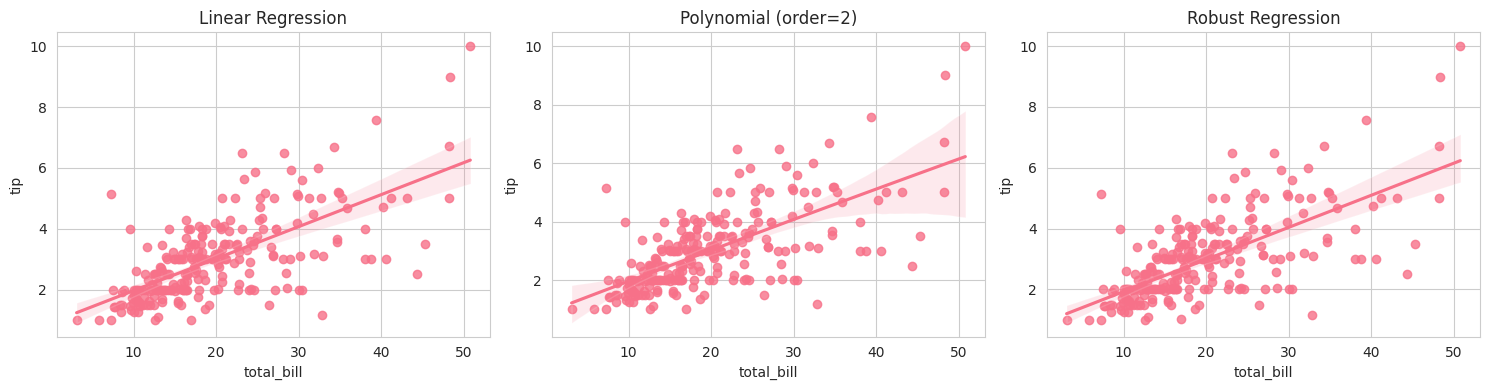

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 線形回帰
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('Linear Regression')

# 多項式回帰
sns.regplot(data=tips, x='total_bill', y='tip', order=2, ax=axes[1])
axes[1].set_title('Polynomial (order=2)')

# ロバスト回帰
sns.regplot(data=tips, x='total_bill', y='tip', robust=True, ax=axes[2])
axes[2].set_title('Robust Regression')

plt.tight_layout()
plt.show()

### 5.2 lmplot（FacetGrid 対応）

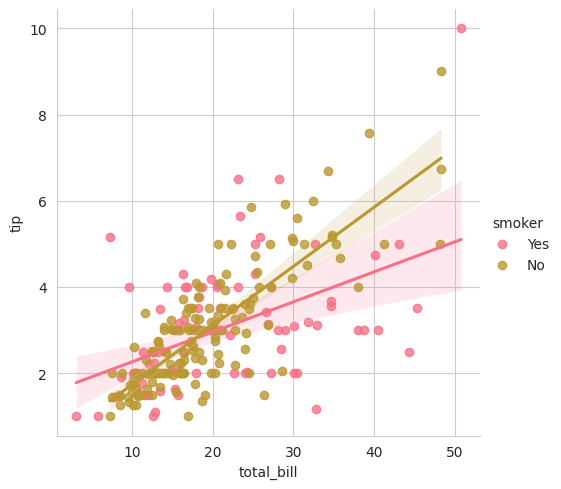

In [29]:
# カテゴリごとの回帰線
g = sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.show()

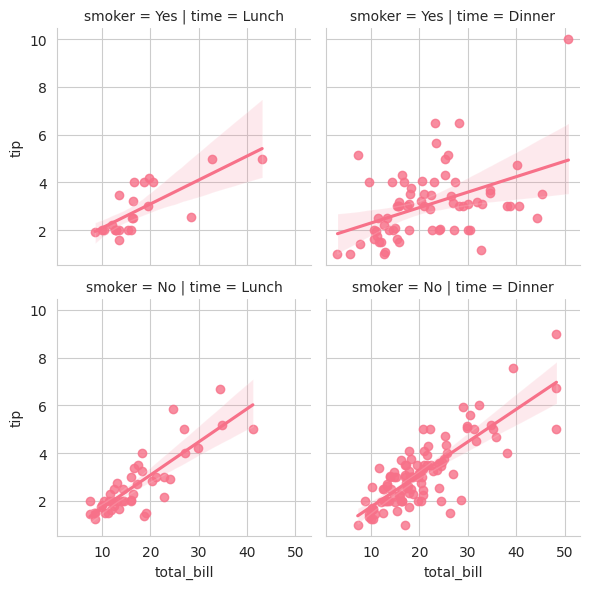

In [30]:
# 複数パネル
g = sns.lmplot(data=tips, x='total_bill', y='tip', 
               col='time', row='smoker', height=3)
plt.show()

### 5.3 residplot（残差プロット）

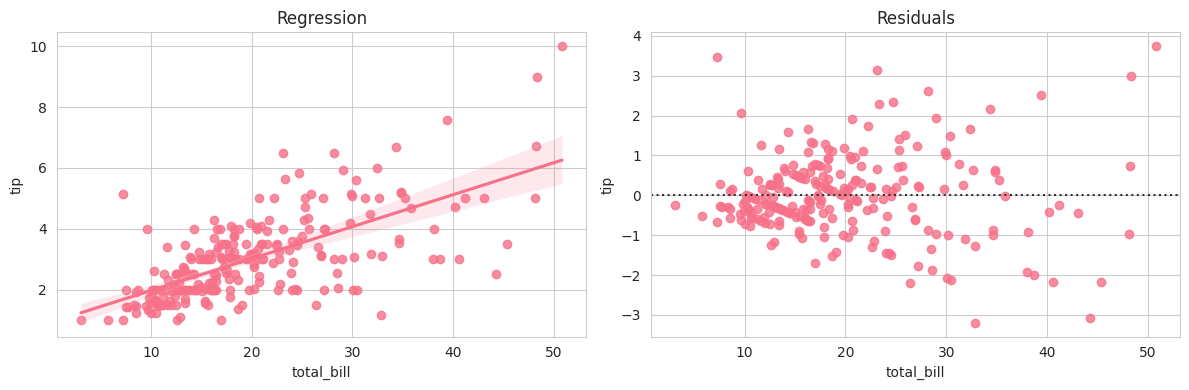

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 回帰プロット
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('Regression')

# 残差プロット
sns.residplot(data=tips, x='total_bill', y='tip', ax=axes[1])
axes[1].set_title('Residuals')

plt.tight_layout()
plt.show()

---
## 6. スタイルとカラーパレット

### 6.1 カラーパレット

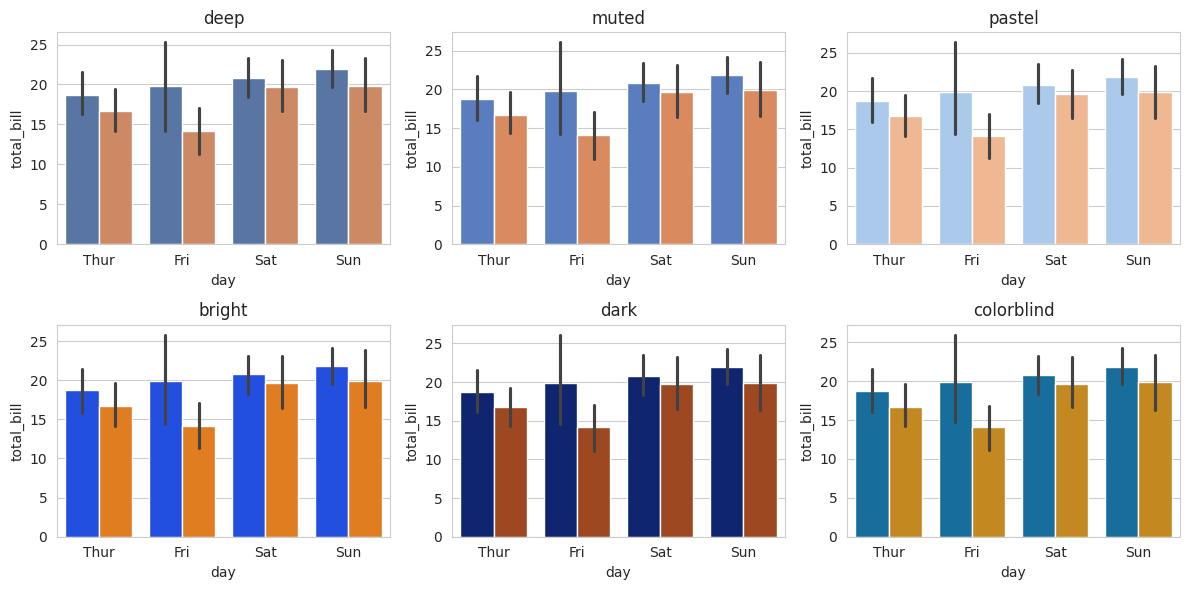

In [32]:
# 利用可能なパレット例
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for ax, palette in zip(axes.flat, palettes):
    sns.barplot(data=tips, x='day', y='total_bill', hue='sex', 
                palette=palette, ax=ax)
    ax.set_title(palette)
    ax.legend([], frameon=False)  # 凡例を非表示

plt.tight_layout()
plt.show()

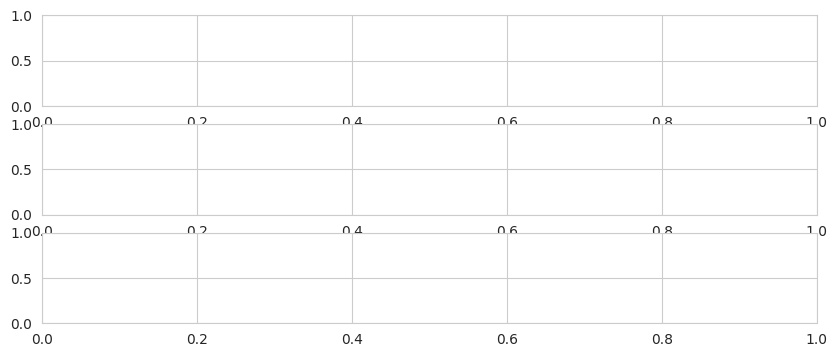

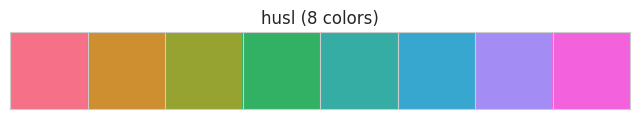

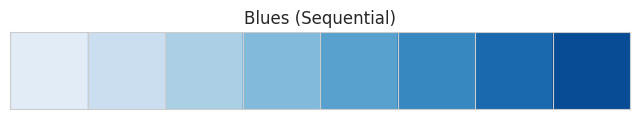

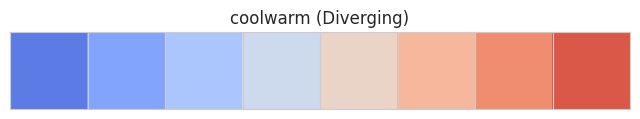

In [33]:
# パレットの表示
fig, axes = plt.subplots(3, 1, figsize=(10, 4))

# カテゴリカルパレット
sns.palplot(sns.color_palette('husl', 8))
plt.title('husl (8 colors)')
plt.show()

# シーケンシャルパレット
sns.palplot(sns.color_palette('Blues', 8))
plt.title('Blues (Sequential)')
plt.show()

# ダイバージングパレット
sns.palplot(sns.color_palette('coolwarm', 8))
plt.title('coolwarm (Diverging)')
plt.show()

### 6.2 コンテキストの設定

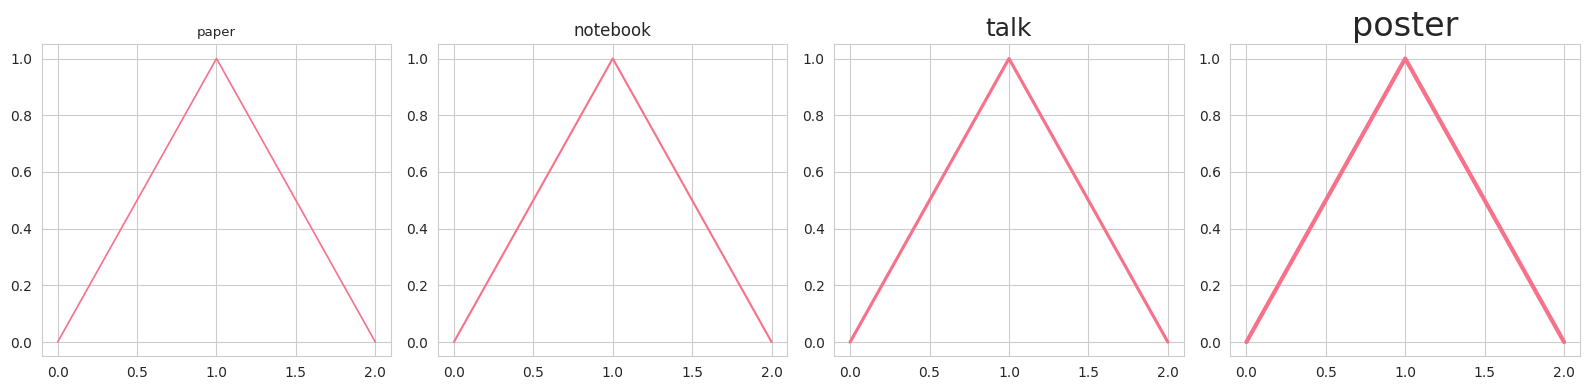

In [34]:
# コンテキストによるサイズ変更
contexts = ['paper', 'notebook', 'talk', 'poster']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, context in zip(axes, contexts):
    with sns.plotting_context(context):
        ax.plot([0, 1, 2], [0, 1, 0])
        ax.set_title(context)

plt.tight_layout()
plt.show()

### 6.3 図のスタイルカスタマイズ

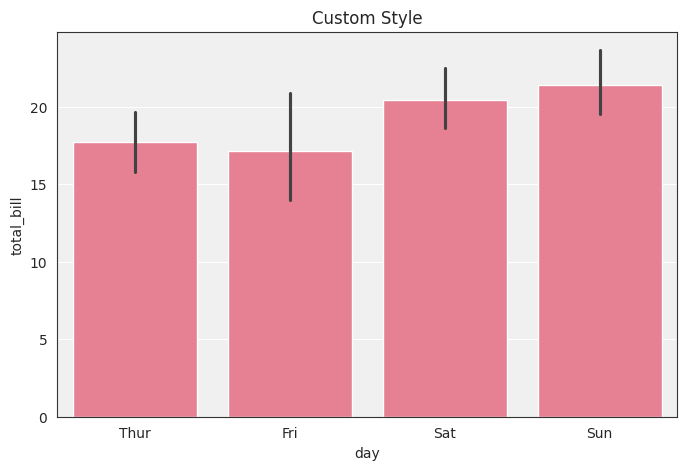

In [35]:
# カスタムスタイル
custom_style = {
    'axes.facecolor': '#f0f0f0',
    'axes.edgecolor': '#333333',
    'axes.grid': True,
    'grid.color': 'white',
    'grid.linewidth': 2,
}

with sns.axes_style('darkgrid', rc=custom_style):
    plt.figure(figsize=(8, 5))
    sns.barplot(data=tips, x='day', y='total_bill')
    plt.title('Custom Style')
    plt.show()

### 📝 6章 練習問題

tips データセットを使って以下を実行してください。

1. `coolwarm` パレットを使って day ごとの total_bill の箱ひげ図を作成
2. `talk` コンテキストを使ってプレゼンテーション用のサイズで散布図を作成

In [36]:
# 練習問題の解答欄



---
## まとめ

このチュートリアルで学んだことをまとめます：

| カテゴリ | 主な関数 | 用途 |
|---------|---------|------|
| 分布 | `histplot()`, `kdeplot()`, `displot()` | 1変数・2変数の分布可視化 |
| カテゴリカル | `barplot()`, `boxplot()`, `violinplot()` | カテゴリごとの比較 |
| 関係性 | `scatterplot()`, `lineplot()`, `pairplot()` | 変数間の関係 |
| 回帰 | `regplot()`, `lmplot()`, `residplot()` | 回帰分析の可視化 |
| スタイル | `set_style()`, `set_palette()`, `set_context()` | グラフの見た目設定 |

## 次のステップ

初級を終えたら、**seaborn 中級チュートリアル** で以下を学びましょう：
- FacetGrid を使った複雑なグラフ配置
- カスタムカラーパレットの作成
- 統計的注釈の追加
- matplotlib との高度な連携
- 実践的なデータ可視化プロジェクト

---
## 総合演習

これまで学んだ内容を使って、以下の課題に挑戦してください。

### 課題：tips データセットの総合分析

tips データセットを使って、以下の可視化を作成しなさい：

1. **分布の確認**
   - total_bill と tip のヒストグラム（KDE付き）を並べて表示

2. **カテゴリ別の比較**
   - 曜日（day）と時間帯（time）ごとの total_bill の箱ひげ図
   - 喫煙者（smoker）と性別（sex）ごとのチップ率（tip/total_bill）の比較

3. **関係性の分析**
   - total_bill と tip の散布図（time で色分け、size でマーカーサイズ）
   - 回帰線付きの散布図で、相関を確認

4. **スタイルの適用**
   - 上記のグラフを `whitegrid` スタイル、`Set2` パレットで統一

In [37]:
# 総合演習の解答欄

